<a href="https://colab.research.google.com/github/burakugurr/AI-ML-DL/blob/master/clusterMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np


In [85]:
features, true_labels = make_blobs(
    n_samples=2000,
    centers=3,
    cluster_std=1.55,
    random_state=42
)
datas = {
    'X1':features[:,0],
    'X2':features[:,1],
    'label':true_labels
}

In [122]:
data = pd.DataFrame(data=datas,columns=['X1','X2','label'])
data.head(10)

,X1,X2,label
0,4.440646,-0.943696,1
1,5.479146,3.149860,1
2,2.545714,-0.076640,1
3,-6.963180,-8.402680,2
4,-3.792720,-8.169805,2
5,-5.119416,-8.594865,2
6,-9.000516,-3.799832,2
7,3.905428,1.950769,1
8,-3.794140,8.146006,0
9,-5.051053,-6.579243,2


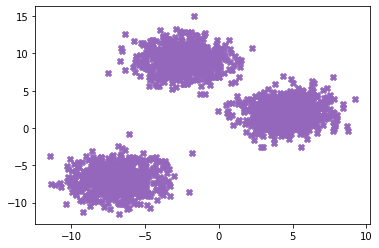

In [87]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],c=['#9467bd'],marker='X');

* Verileri kendimiz yarattığımız için harici kaynaklar sınıfında bulunan değerlendirme metriklerine bakmamız gerekmektedir.

In [88]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:,:2])

## 1-KMeans

In [95]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=5000,
    random_state=42
).fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

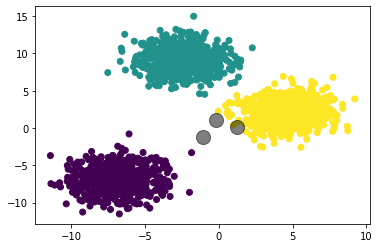

In [96]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [97]:
kmeans_score = kmeans.score(scaled_features,y_kmeans)
kmeans_score

-295.6866707456031

### Mutual Information based Score

In [100]:
metrics.adjusted_mutual_info_score(true_labels, y_kmeans)   #AMI

0.9965822161626248

In [102]:
metrics.normalized_mutual_info_score(true_labels, y_kmeans)   #NMI

0.9965853313238792

### Rand Index

In [103]:
metrics.cluster.adjusted_rand_score(true_labels, y_kmeans)   

0.998498874063205

### Fowlkes-Mallows Score

In [105]:
metrics.cluster.fowlkes_mallows_score(true_labels, y_kmeans)   

0.9989987493759085

### Precision

In [114]:
metrics.precision_score(true_labels, y_kmeans,pos_label='positive',average='micro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.0005

### Recall

In [116]:
metrics.recall_score(y_kmeans,true_labels ,pos_label='positive',average='micro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.0005

### Purity

In [119]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity_score(true_labels,y_kmeans)  

0.9995

### Jaccard similarity coefficient score

In [124]:
metrics.jaccard_score(true_labels,y_kmeans,pos_label='positive',average='micro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.00025006251562890725